In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install numpy

In [3]:
import numpy as np

In [4]:
data=pd.read_csv('housing.csv')
data.fillna(data.mean(), inplace=True)

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<Figure size 1800x2880 with 0 Axes>

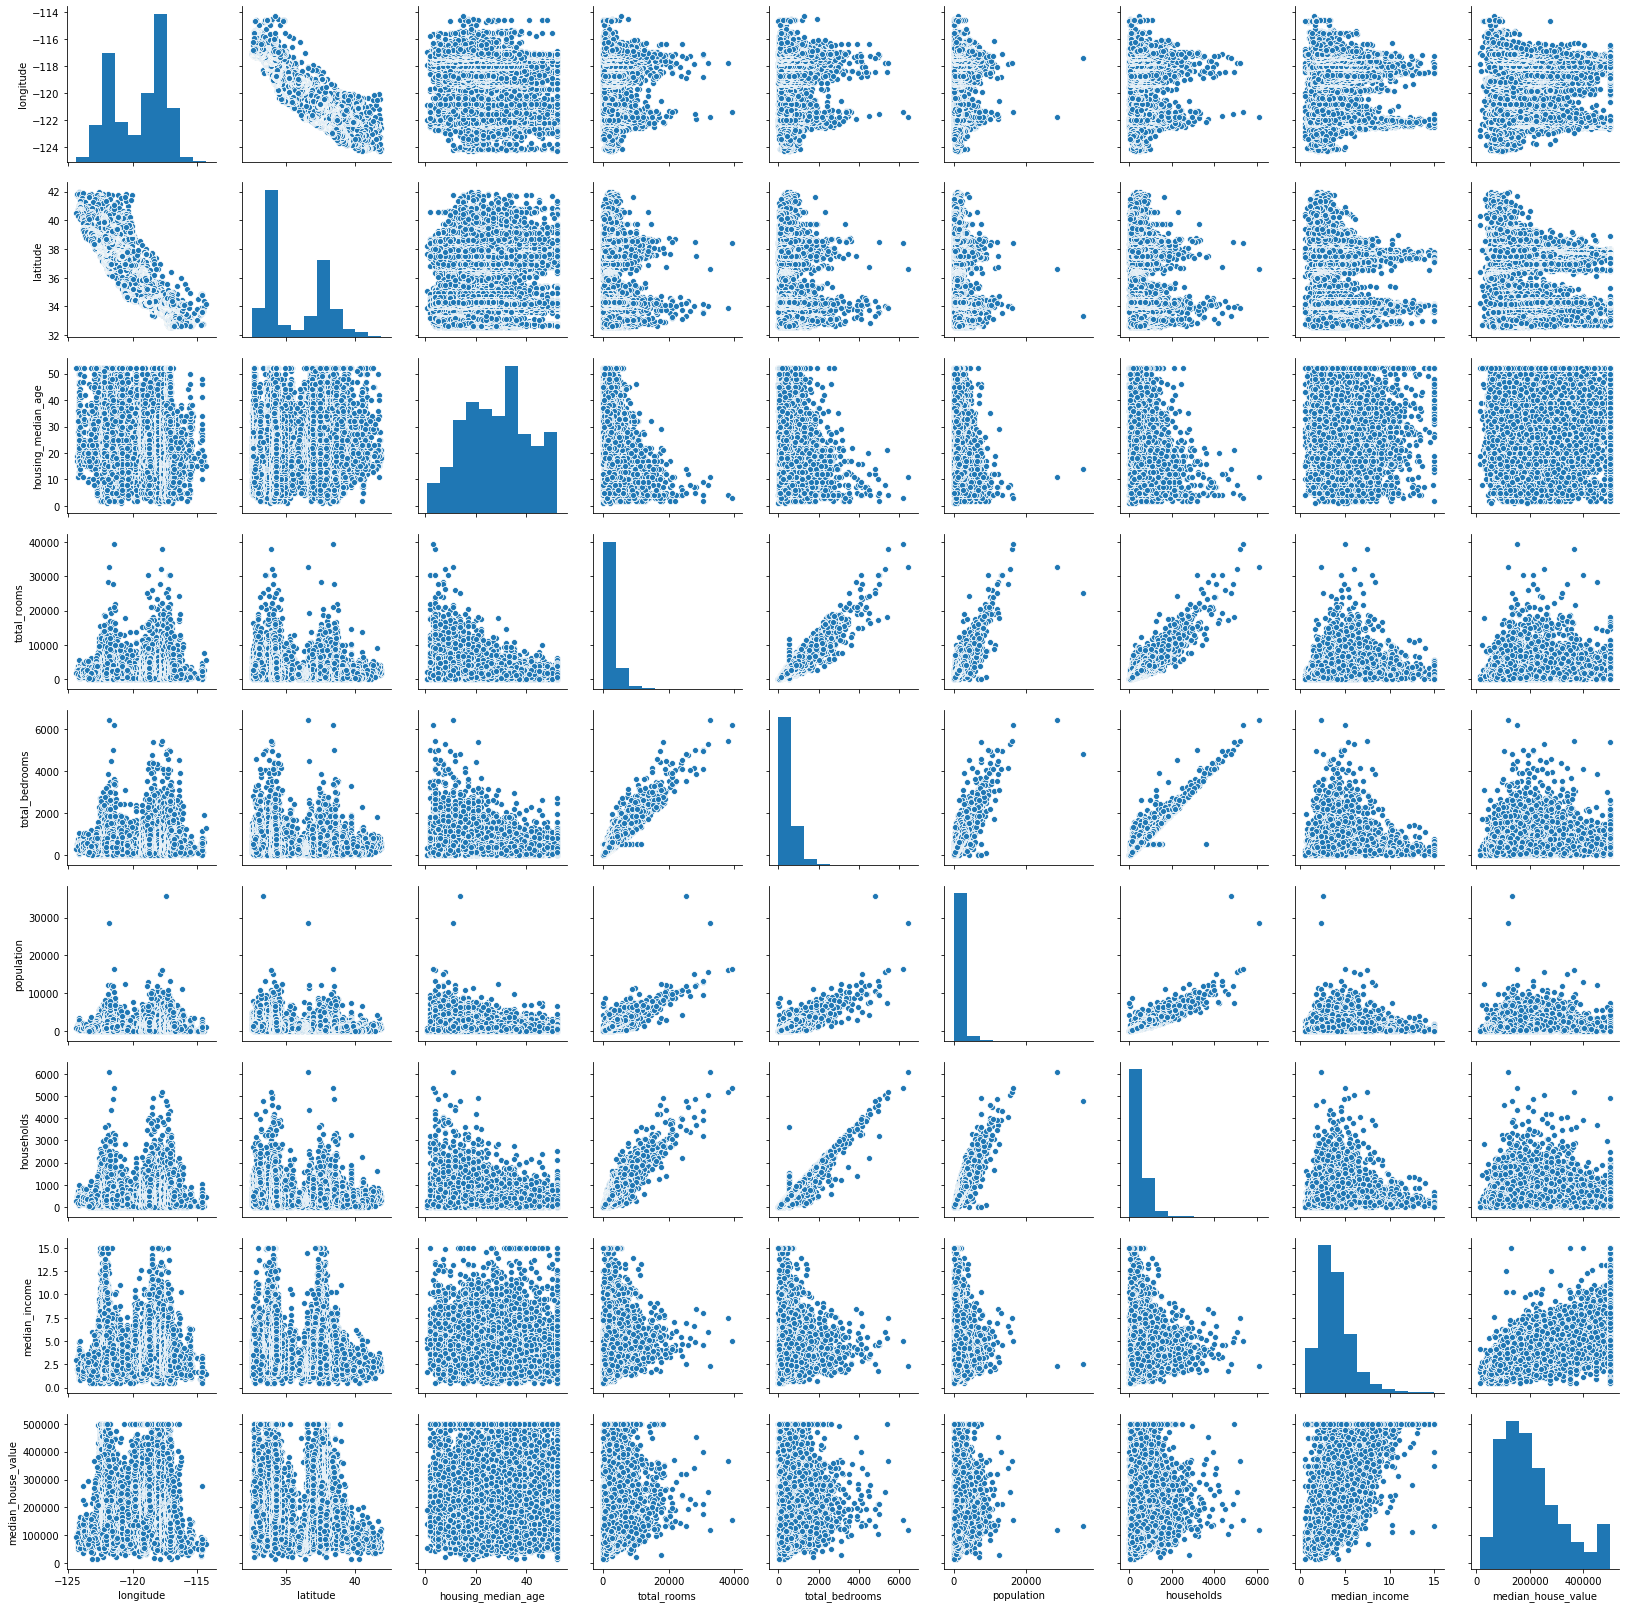

In [9]:
plt.figure(figsize=(25,40))
sns.pairplot(data)
plt.show()

In [10]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
data.ocean_proximity=data.ocean_proximity.map({"<1H OCEAN":1.0,"INLAND":2.0,"NEAR OCEAN":3.0,"NEAR BAY":4.0,"ISLAND":5.0})

In [12]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
train_data = X_train.join(Y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,3.0,103000.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,3.0,382100.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,3.0,172600.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,3.0,93400.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,2.0,96500.0
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,1.0,229200.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,2.0,97800.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,1.0,222100.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,1.0,283500.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E91F997188>,
      dtype=object)

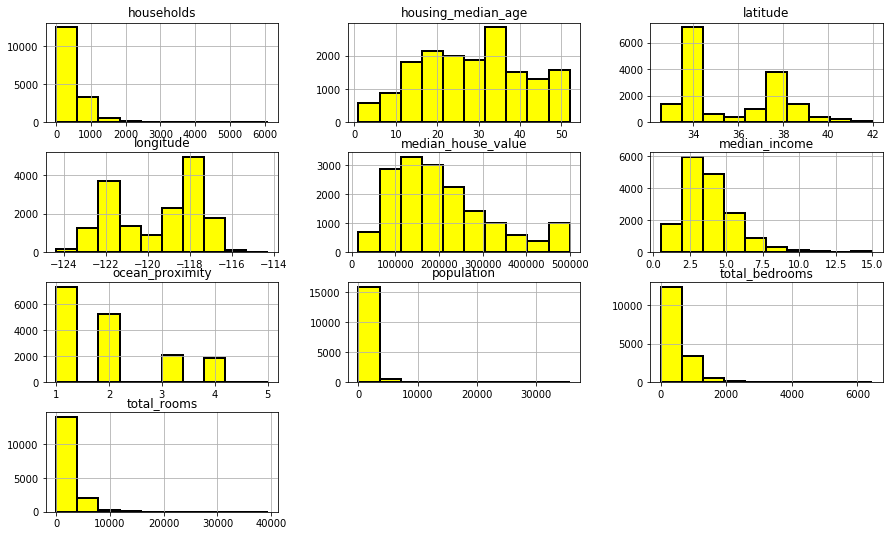

In [13]:
train_data.hist(figsize=(15,9),edgecolor='black',linewidth=2,color='yellow')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E91B424848>,
      dtype=object)

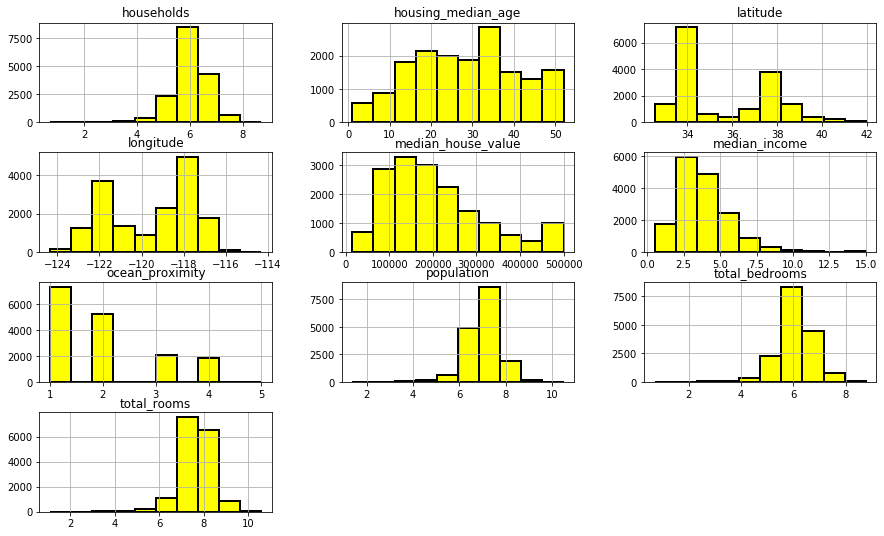

In [14]:
train_data['population']=np.log(train_data['population']+1)
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['households']=np.log(train_data['households']+1)
train_data.hist(figsize=(15,9),edgecolor='black',linewidth=2,color='yellow')

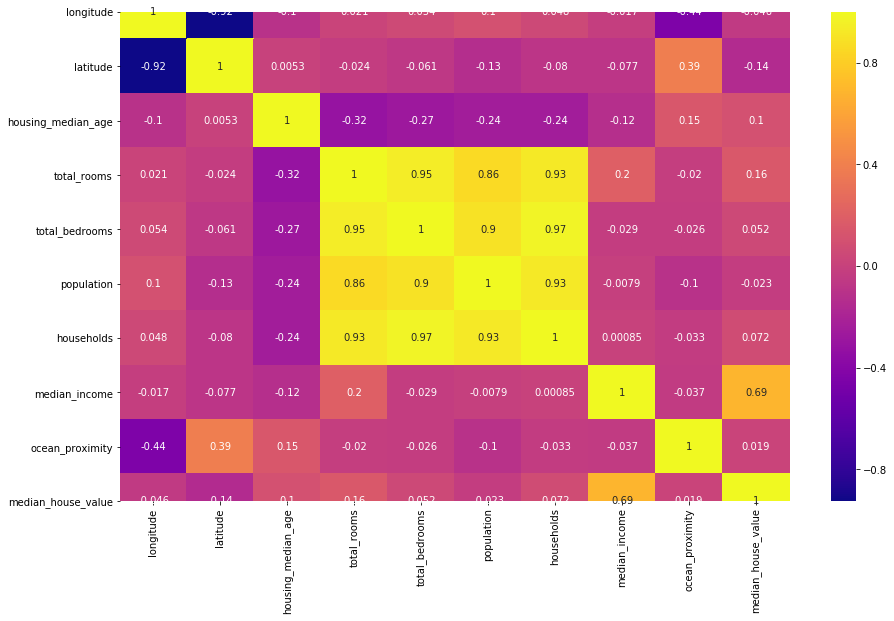

In [15]:
plt.figure(figsize=(15,9))
sns.heatmap(train_data.corr(), annot=True, cmap="plasma")

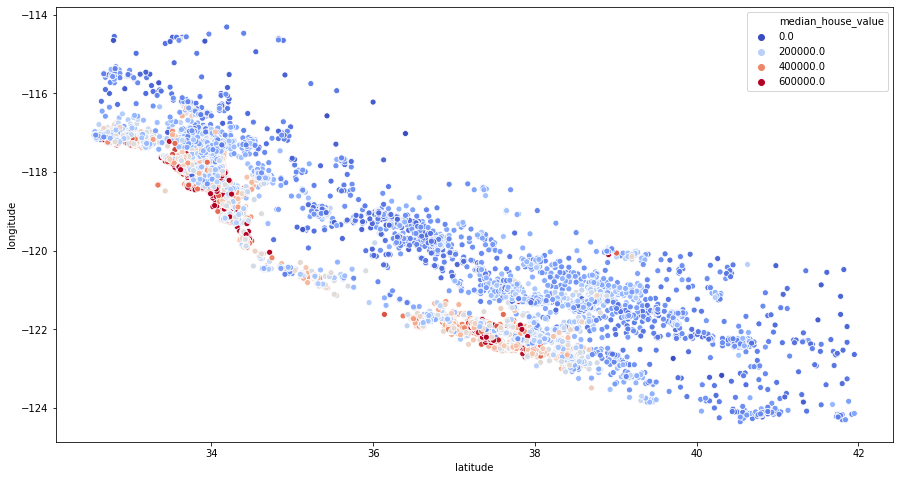

In [16]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(lm.intercept_)

-3635826.896889724


In [19]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
longitude,-43183.948309
latitude,-42581.065020
housing_median_age,1199.547664
total_rooms,-7.975121
total_bedrooms,116.914649
population,-38.920937
households,45.795913
median_income,40446.484964
ocean_proximity,-2011.920112


In [20]:
predictions = lm.predict(X_test)

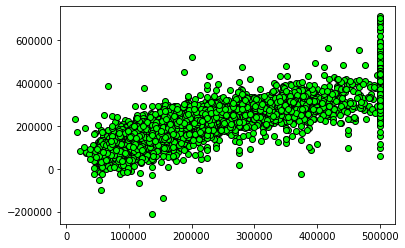

In [21]:
plt.scatter(Y_test,predictions,c='lime', edgecolor='black')
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [23]:
Result={'model':['R2 Score','MSE','MAE','RMSE'],'Accuracy':[r2_score(Y_test, predictions),mean_squared_error(Y_test, predictions),mean_absolute_error(Y_test, predictions),np.sqrt(mean_squared_error(Y_test, predictions))]}
linear_model=pd.DataFrame(Result)
print(linear_model)

      model      Accuracy
0  R2 Score  6.139079e-01
1       MSE  5.059386e+09
2       MAE  5.185855e+04
3      RMSE  7.112936e+04


In [24]:
print(r2_score(Y_test, predictions))

0.6139078854340226


In [25]:
print(mean_squared_error(Y_test, predictions))

5059385733.552708


In [26]:
print(mean_absolute_error(Y_test, predictions))

51858.549678660806


In [27]:
print(np.sqrt(mean_squared_error(Y_test, predictions)))

71129.35915325477


In [29]:

user_input_features = []

# Collect user input for each feature
num_features = len(X_train.columns)  # Get the number of features expected by the model
for i in range(num_features):
    user_input = float(input(f"Enter value for feature {X_train.columns[i]}: "))
    user_input_features.append(user_input)

# Convert the list of user-input features into a NumPy array
new_data = np.array([user_input_features])

# Use the trained model to make predictions on the new data
predictions = lm.predict(new_data)

# Print the predicted values
print("Predicted values:", predictions)


Enter value for feature longitude: -122.30
Enter value for feature latitude: 40.84
Enter value for feature housing_median_age: 49
Enter value for feature total_rooms: 3489
Enter value for feature total_bedrooms: 650
Enter value for feature population: 1065
Enter value for feature households: 700
Enter value for feature median_income: 3.17
Enter value for feature ocean_proximity: 3.0
Predicted values: [126292.38422766]
